In [20]:
# all the imports used here
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.neighbors import KNeighborsClassifier 

# K Nearest Neighbor
Stastical learning - collection of mathmatical + compution tool to understand data aka supervised learning. Goal - predict an output based on one or more inputs. 
- predictors - independent variables - features 
- output - response - dependent variables

- regression problems - observations with numbers - quantitative
- Classification problems - categorical data - qualitative 

KNN - classifier that when presented with a new observation whose category is not known it will attempt to assign that observation to a category, or class based on observations for which it does know. First identifies those k points in the data that are nearest to the point and classifies the new data point as belonging to the most common class among those k neighbors

### Finding Distance Between Two Points

<b>Euclidean distance</b> http://www.mathwarehouse.com/algebra/distance_formula/index.php <br/>

$\sqrt{(a_1-a_2)^2-(b_1-b_2)^2}$

In [21]:
import numpy as np
p1 = np.array([1,1])
p2 = np.array([4,4])
print (p2 - p1)
#square differnce between two points 
print (np.power(p2 - p1, 2))
# sum over two and take the square root
print (np.sqrt(np.sum(np.power(p2 - p1, 2))))

[3 3]
[9 9]
4.24264068712


In [22]:
p1 = np.array([1,1])
p2 = np.array([4,4])

def distance(p1, p2):
    """find the distance between points p1 and p2"""
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

distance(p1, p2)

4.2426406871192848

### Compute "majority vote"
Given an array or sequence of votes, need to determine now many times each occurs and then find the most common element. Return observation corresponding ot highest count

In [23]:
def majority_vote(votes):
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    return vote_counts

In [24]:
votes = [1,2,3,1,2,3,1,1,2,2,3,3,3,3]
vote_counts = majority_vote(votes)
vote_counts

{1: 4, 2: 4, 3: 6}

return the kew with the maximum count

In [25]:
max(vote_counts)

3

In [26]:
print (max(vote_counts.keys()))
print (max(vote_counts.values()))

3
6


In [27]:
for vote, count in vote_counts.items():
    print (vote,count)
# object with elements consisting of tuples of key, value pairs

1 4
2 4
3 6


In [28]:
winners = []
max_count = max(vote_counts.values())
for vote, count in vote_counts.items():
    if count == max_count:
        winners.append(vote)
winners

[3]

if a tie pick one at random

In [29]:
import random

def majority_vote(votes):
    """return the most common element in votes"""
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
            
    return random.choice(winners)

votes2 = [1,2,3,1,2,3,1,1,2,2,3,3,3,3,4,4,4,4,4,4]
majority_vote(votes2)

3

<b> mode </b> most common element in an array or sequence <br/>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.mode.html

In [30]:
import scipy.stats as ss

def majority_vote_short(votes):
    """return the most common element in votes"""
    mode, count = ss.mstats.mode(votes)
    return mode
            
    return random.choice(winners)

majority_vote_short(votes2)

array([ 3.])

for kNN will use `majority_vote` function instead of the scipy mode module because need to pick one at random incase of a tie. 

### Finding Nearest Neighbors
Need to find which point are the nearest nighbor of any given point to classify

In [31]:
points_samp = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
print (points_samp)
p = np.array([2.5,2])
print (p)

[[1 1]
 [1 2]
 [1 3]
 [2 1]
 [2 2]
 [2 3]
 [3 1]
 [3 2]
 [3 3]]
[ 2.5  2. ]


[0.5, 3.5, 0.5, 3.5]

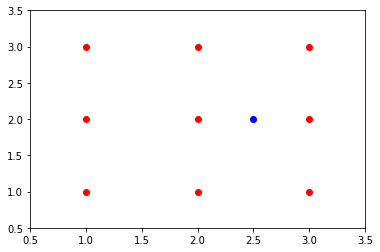

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(points_samp[:,0], points_samp[:,1], "ro")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5, 3.5, 0.5, 3.5])

In [33]:
distances = np.zeros(points_samp.shape[0])
#loop over all points
for i in range(len(distances)):
    distances[i] = distance(p, points_samp[i])
    #compute the distance between point p and every other point
print (distances)
print ("distance", (points_samp[4]), "from point p:", (p), "is:", (distances[4]))

# sort distances and return those k points that are nearest to poitn p

[ 1.80277564  1.5         1.80277564  1.11803399  0.5         1.11803399
  1.11803399  0.5         1.11803399]
distance [2 2] from point p: [ 2.5  2. ] is: 0.5


numpy <b>argsort</b> - sort the given array

In [34]:
print ("distances",(distances))
ind = np.argsort(distances)
print ("ind",(ind))
print ("sorted distances",(distances[ind]))
print ("first two", (distances[ind[0:2]]))

distances [ 1.80277564  1.5         1.80277564  1.11803399  0.5         1.11803399
  1.11803399  0.5         1.11803399]
ind [4 7 3 5 6 8 1 0 2]
sorted distances [ 0.5         0.5         1.11803399  1.11803399  1.11803399  1.11803399
  1.5         1.80277564  1.80277564]
first two [ 0.5  0.5]


In [35]:
def find_nearest_neighbor(p, points, k=5):
    """find the k nearest neighbors of point p and return their indicies."""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

indk3 = find_nearest_neighbor(p, points_samp, 3); print(points_samp[indk3])
indk4 = find_nearest_neighbor(p, points_samp, 4); print(points_samp[indk4])

[[2 2]
 [3 2]
 [2 1]]
[[2 2]
 [3 2]
 [2 1]
 [2 3]]


In [36]:
def knn_predict(p, points, outcomes, k=5):
    #find k nearest neighbors
    ind = find_nearest_neighbor(p, points, k)
    return majority_vote(outcomes[ind])
    # predict the class of p based on majority vote

In [37]:
outcomes_samp = np.array([0,0,0,0,1,1,1,1,1])
print (len(outcomes_samp))
print (knn_predict(np.array([2.5,2.7]), points_samp, outcomes_samp, k=2))
print (knn_predict(np.array([1.0,2.7]), points_samp, outcomes_samp, k=2))

9
1
0


### Generating Synthetic Data
 - create two end points where 
     - first end points are from class <b>0</b>
     - second end points are from class <b>1</b>
Generate predictors from two bivariate normal distributions where the first distribution gives rise to observations belonging to `class 0` and the second gives rise to observations belonging to `class 1`.<br><b>bivariate</b> - two variables eg. `(x,y)`

<b>ipstats module<b> 

In [38]:
from scipy import stats as ss

In [39]:
ss.norm(0,1).rvs((5,2))
# specify the mean and standard deviation 
#for observations coming from class 1
# 5 rows and 2 columns of observations

array([[ 0.30231994,  1.1675533 ],
       [-0.1671263 , -0.21876044],
       [-0.84121231, -0.071069  ],
       [-0.66044021, -1.98582885],
       [-0.46100743,  0.95596707]])

In [40]:
ss.norm(1,1).rvs((5,2))

array([[ 0.36465256,  2.10442776],
       [ 0.55319503,  1.223868  ],
       [ 0.65298475, -0.7193085 ],
       [-0.38658297,  1.82999474],
       [ 2.59537048,  0.90583229]])

In [41]:
# concatenate two arrays
np.concatenate((ss.norm(0,1).rvs((5,2)),
               ss.norm(1,1).rvs((5,2))), axis=0)
# axis = 0 along the rows

array([[ 1.34857224, -0.01968661],
       [ 0.28671033,  1.06728088],
       [ 0.33671853, -0.60513279],
       [-0.12867543, -1.01721381],
       [ 1.26339995, -0.25831705],
       [ 0.83596252,  0.64641021],
       [ 3.7339918 ,  1.66517196],
       [ 0.4770303 ,  2.78884191],
       [-0.07632544,  1.42411755],
       [ 1.53152994,  1.22492703]])

In [42]:
# in a function
def generate_synth_data(n = 50):
    """create two sets of points from bivariate normal distribution"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),
               ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
# repeat 0 n times   # repeat 1 n times
    return (points, outcomes)
generate_synth_data()
(points, outcomes)=generate_synth_data(n=20)
(points, outcomes)

(array([[-0.0932545 , -1.41895096],
        [ 1.57994809, -0.76714813],
        [ 0.29696494, -0.82310613],
        [-0.59633144,  0.80767632],
        [-2.02369111, -1.00285989],
        [-1.34737199, -1.7478072 ],
        [-1.68898615, -0.16333134],
        [ 0.58470536,  1.14205532],
        [-0.67433775, -2.23114235],
        [ 0.42895377,  0.86014222],
        [-1.38301215, -0.12086301],
        [ 1.57416557, -0.95867677],
        [ 1.98012491,  0.02984355],
        [-1.38542931, -0.50878848],
        [-0.77159019,  0.28861028],
        [ 0.27642011, -0.77245512],
        [-0.94127168,  1.28867396],
        [-1.38961846,  1.01145641],
        [-1.78243647, -0.03174515],
        [-2.08509422, -1.22077152],
        [ 2.18464824,  1.86708029],
        [ 0.79616529,  0.8745351 ],
        [ 0.06928832,  1.54556689],
        [ 0.34460955,  0.0619617 ],
        [ 2.42013409,  1.96914255],
        [ 1.07484976,  1.83587868],
        [ 1.43505201,  1.56926143],
        [ 0.68832906,  1.251

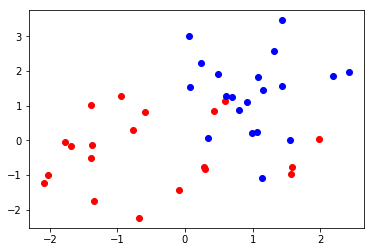

In [43]:
n=20
plt.figure()
# :n = first n rows
# 0 column 0 - x coordinates
# 1 column 1 - y coordinates
plt.plot(points[:n,0], points[:n,1], "ro")
# n: remaining rows 
plt.plot(points[n:,0], points[n:,1], "bo")

### Making a Prediction Grid
examine some part of the predictor space and compute the class prediction for each point in the grid using the knn classifier - find out how each point is classified in a rectangular region of the predictor space. 

In [44]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """classify each point on the prediciton grid."""
    # unpack tuple limits
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    # np.arrange(start, stop, step)
    # even spaces values within a given interval
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    # loop over all x values
    # loop over all y values
    # ask knn predict algorithm or function to predict the class label
    # capture points in prediction grid array
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            # specify and index using square brackets the first argument is role of the array
            #corresponding index locations in the xs and ys vectors
            p = np.array([x,y])
            prediction_grid[j,i]=knn_predict(p, predictors, outcomes, k)
            # k = number of points to be considerend 
            # when making class labeled predictions for point p
    return (xx, yy, prediction_grid)


<b>meshgrid</b> takes in two or more vectors and returns matricies for the first containing the x values for each grid point and the second containing the y values for each grid point <br/>
<b>enumerate</b> dealing with sequences need access to two things - like an index - sequence of tuples - (index , item)

In [45]:
# example enumerate
seasons = ["spring", "summer", "fall", "winter"]
for ind, season in enumerate(seasons):
    print (ind, season)

0 spring
1 summer
2 fall
3 winter


### Plotting the Prediction Grid
small value - decision boundary is more smooth the larger the value of k. k controls the smoothness of the fit

In [55]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

(100, 2)
(100,)


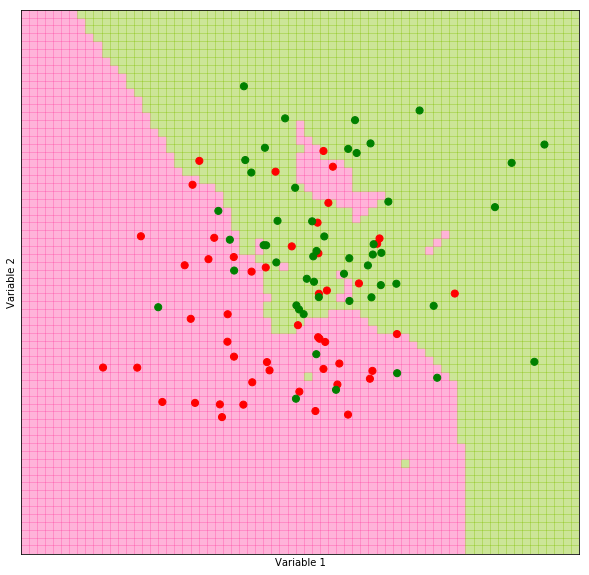

In [47]:
(predictors, outcomes) = generate_synth_data()
print (predictors.shape)
print (outcomes.shape)
k=5; filename="knn_synth_5.pdf"; limits=(-3,4,-3,4); h=0.1 # h = step size
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

(100, 2)
(100,)


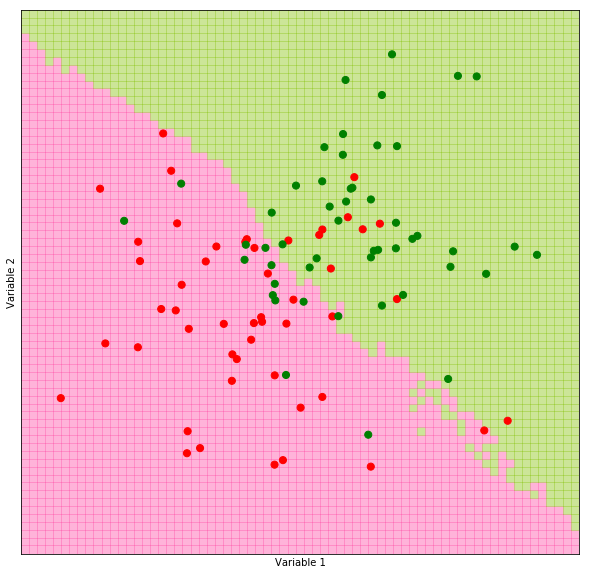

In [48]:
(predictors, outcomes) = generate_synth_data()
print (predictors.shape)
print (outcomes.shape)
k=50; filename="knn_synth_50.pdf"; limits=(-3,4,-3,4); h=0.1 # h = step size
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

k = 50 smooth decision boundary
Need to find out how well method preforms on data that we haven't seen.
k too small or too large = <b>bias-variance tradeoff </b>. Some intermediate value might be best. <br>
Here k=5 is better.

### Applying kNN
<b>SciKitLearn</b> Open Source Machine Learning Library for Python. Will use knn classifier.<br>
Compare homemade classifier to knn classifier from SciKitLearn on the Iris Dataset. <br>
<b>Iris Dataset</b> - OG dataset created by Ron Fisher in 1933.
150 different iris flowers. 50 of each three different species. <br>
Covariates: sepal length, sepal width, petal length, and petal width

In [49]:
from sklearn import datasets
iris = datasets.load_iris()

In [50]:
iris.data.shape

(150, 4)

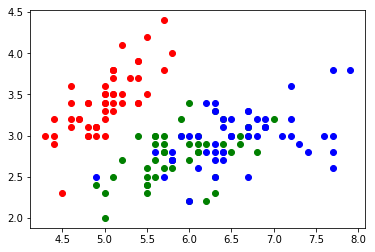

In [51]:
predictors_iris = iris.data[:, 0:2]
#[all the rows, columns 0 and 1]
outcomes = iris.target
plt.plot(predictors_iris[outcomes==0][:,0], predictors_iris[outcomes==0][:,1], "ro")
plt.plot(predictors_iris[outcomes==1][:,0], predictors_iris[outcomes==1][:,1], "go")
plt.plot(predictors_iris[outcomes==2][:,0], predictors_iris[outcomes==2][:,1], "bo")

x-axis and y-axis correspond to the values of our predictors <br>
make a prediction grid plot

In [57]:
def plot_prediction_grid2 (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors_iris[:,0], predictors_iris[:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

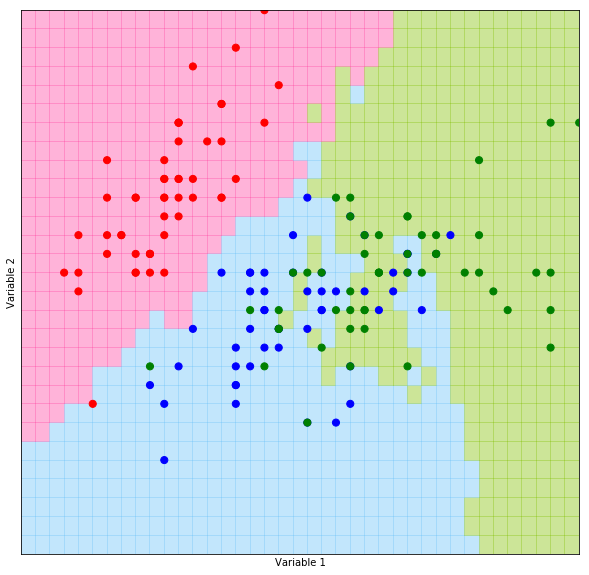

In [58]:
k=5; filename="iris_grid.pdf"; limits=(4,8,1.5,4.5); h=0.1 # h = step size
(xx, yy, prediction_grid) = make_prediction_grid(predictors_iris, outcomes, limits, h, k)
plot_prediction_grid2(xx, yy, prediction_grid, filename)

In [59]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors_iris, outcomes)
sk_predictions = knn.predict(predictors_iris)
print (sk_predictions.shape)
print (sk_predictions[0:10])

(150,)
[0 0 0 0 0 0 0 0 0 0]


In [64]:
my_predictions = np.array([knn_predict(p, predictors_iris, outcomes, 5) for p in predictors_iris])
print (my_predictions.shape)
print (sk_predictions[0:10])

(150,)
[0 0 0 0 0 0 0 0 0 0]


In [69]:
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [66]:
100*np.mean(sk_predictions == my_predictions)

96.0

In [67]:
print ("SciKitLearn kNN == Home Made kNN", 100*np.mean(sk_predictions == my_predictions), "%")

SciKitLearn kNN == Home Made kNN 96.0 %


How frequently do my_predictions and sk_predictions agree with the actual observed outcomes

In [68]:
print ("SciKitLearn",100*np.mean(sk_predictions == outcomes))
print ("Homemade",100*np.mean(my_predictions == outcomes))

SciKitLearn 83.3333333333
Homemade 84.6666666667
